**Siche Chen HW1**

**Exercise 1 – Procedural vs Functional Programming**

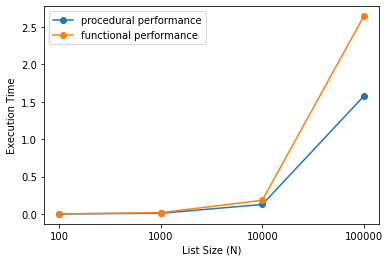

In [77]:
# Q1. Create a function that will randomly generate a list of N numbers and words. 
# Numbers and words count are random and the order is random too.
import random
import string
# define the function to generate the list
def generate_list(N):
# first assign a random value for the number of numbers generated in the list.
    n = random.randint(1,N+1)
# create an empty list to contain numbers
    list = []
# generate random numbers
    for i in range(1,n):
        a = random.randint(1,1000)
        list.append(a)

# generate random words
    for j in range(1,N-n):
        w = ''
        w = ''.join(random.choice(string.ascii_lowercase) for i in range(random.randint(1,30)))
        list.append(w)
    # shuffle the list to make the order random
    random.shuffle(list)
    return list


# Q2. Create two functions to calculate the desired output as follows:
   
    #a. Procedural code by using loop
def procedural(list):
    count_num = 0
    count_words = 0
    for i in list:
        if isinstance(i,int):
            count_num += 1
        else:
            count_words +=1
    return count_num, count_words

    
    #b. Functional code by using list comprehension.    
def functional(list):
    w = [x for x in list if isinstance(x,str)]
    count_words = len(w)
    n = [y for y in list if isinstance(y,int)]
    count_num = len(n)
    return count_num,count_words


# 3. present the performance difference among the 2 solutions for 
# different list sizes (N=100, 1000, 10000, 100000).
import timeit
import matplotlib.pyplot as plt
x=[]
y=[]
z=[100,1000,10000,100000]
zi = list(range(len(z)))
for i in [100,1000,10000,100000]:
    l = generate_list(i)
    p=timeit.timeit('procedural(l)','from __main__ import l, procedural', number=100)
    f=timeit.timeit('functional(l)','from __main__ import l, functional', number=100)
    x.append(p)
    y.append(f)
plt.plot(zi,x,label = 'procedural performance', linestyle = '-', marker='o') 
plt.plot(zi,y,label = 'functional performance', linestyle = '-', marker='o')
plt.xticks(zi,z)
plt.xlabel('List Size (N)')
plt.ylabel('Execution Time')
plt.legend()
plt.show()



**Exercise 2 – Simple Student Grading System - memory based**

To begin, enter a number from 1-7 to choose from the following menu:
 1.Load the data set from exams.csv file. 
 2.Print a list of student names, final scores, and letter grades sorted by names. 
 3.Print score summary 
 4.Identify values that are larger than the mean and two times standard deviation. 
 5.Plot a pie chart showing the final letter grades distribution. 
 6.Create box plots parameters. 
 7.Exit the system.
 Enter number here: 0
Please enter a number from 1-7 to begin
To begin, enter a number from 1-7 to choose from the following menu:
 1.Load the data set from exams.csv file. 
 2.Print a list of student names, final scores, and letter grades sorted by names. 
 3.Print score summary 
 4.Identify values that are larger than the mean and two times standard deviation. 
 5.Plot a pie chart showing the final letter grades distribution. 
 6.Create box plots parameters. 
 7.Exit the system.
 Enter number here: 1
Data successfully loaded
To begin, enter a number from 1-7 to choose

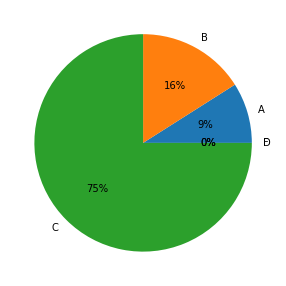

To begin, enter a number from 1-7 to choose from the following menu:
 1.Load the data set from exams.csv file. 
 2.Print a list of student names, final scores, and letter grades sorted by names. 
 3.Print score summary 
 4.Identify values that are larger than the mean and two times standard deviation. 
 5.Plot a pie chart showing the final letter grades distribution. 
 6.Create box plots parameters. 
 7.Exit the system.
 Enter number here: 6
The box plot parameters are:

30.6 60.35 68.0 80.275 99.6
To begin, enter a number from 1-7 to choose from the following menu:
 1.Load the data set from exams.csv file. 
 2.Print a list of student names, final scores, and letter grades sorted by names. 
 3.Print score summary 
 4.Identify values that are larger than the mean and two times standard deviation. 
 5.Plot a pie chart showing the final letter grades distribution. 
 6.Create box plots parameters. 
 7.Exit the system.
 Enter number here: 7
You have exited the system


In [80]:
import statistics
import csv

# read data file
f=open("/Users/evelyn/422_Python_Java/exams.csv")
data=f.read()
row=data.split("\n")
#print(row)

final_score=dict()
grade=dict()

#calculate final score and assign letter grade accordingly
for i in row[1:len(row)-1]:
    s=i.split(",")
    score=0.4*int(s[2])+0.3*int(s[3])+0.3*int(s[4])
    final_score[s[1]]=score
    if 10>score>0:
        grade[s[1]]="F"
    elif 20>score>10:
        grade[s[1]]="D"
    elif 80>score>20:
        grade[s[1]]="C"
    elif 90>score>80:
        grade[s[1]]="B"
    else:
        grade[s[1]]="A"
        
# sort names
sorted_name=sorted(list(final_score.keys()))
list_grade= list(grade.values())
list_score=list(final_score.values())

# calculate output for each menu options
output1=[(x,final_score[x],grade[x]) for x in sorted_name]
output2=(len(sorted_name),min(list_score),max(list_score),statistics.mean(list_score),max(list_score,key=list_score.count),statistics.stdev(list_score))
output3=[x for x in list_score if x > statistics.mean(list_score)+2*statistics.stdev(list_score)]
output4=[min(list_score)]+statistics.quantiles(list_score,n=4)+[max(list_score)]
grade=[len(list(filter(lambda x: x=="A",list_grade))),len(list(filter(lambda x: x=="B",list_grade))),len(list(filter(lambda x: x=="C",list_grade))),len(list(filter(lambda x: x=="D",list_grade))),len(list(filter(lambda x: x=="F",list_grade)))]
labels = ['A','B','C','D','F']

# return the output to user accordingly
x = input('To begin, enter a number from 1-7 to choose from the following menu:\n 1.Load the data set from exams.csv file. \n 2.Print a list of student names, final scores, and letter grades sorted by names. \n 3.Print score summary \n 4.Identify values that are larger than the mean and two times standard deviation. \n 5.Plot a pie chart showing the final letter grades distribution. \n 6.Create box plots parameters. \n 7.Exit the system.\n Enter number here: ')
while x != "7":
    if x =='1':
        print("Data successfully loaded")
    elif x =='2':
        print("The list of student names, final scores, and letter grades sorted by names: \n")
        print(*output1,sep="\n")
    elif x =='3':
        #for y in ['Student Count: ', 'Min: ', 'Max: ', 'Mean: ', 'Mode: ','Standard Deviation: ']:
            #print(y+*output2)
        print("Student Count, Min, Max, mean, mode, and standard deviation are respectively: \n")
        print(*output2, sep="    ")
    elif x =='4':
        print("Values that are greater than mean for 2 standard deviation are: ")
        print(*output3, sep=" ")
    elif x =='6':
        print("The box plot parameters are:\n")
        print(*output4)
    elif x =='5':
        print("The pie chart is plotted below: \n")
        fig = plt.figure(figsize =(5, 5))
        plt.pie(grade, labels = labels,autopct = '%1.0f%%') 
        plt.show()
    else:
        print("Please enter a number from 1-7 to begin")
    x = input('To begin, enter a number from 1-7 to choose from the following menu:\n 1.Load the data set from exams.csv file. \n 2.Print a list of student names, final scores, and letter grades sorted by names. \n 3.Print score summary \n 4.Identify values that are larger than the mean and two times standard deviation. \n 5.Plot a pie chart showing the final letter grades distribution. \n 6.Create box plots parameters. \n 7.Exit the system.\n Enter number here: ')

print("You have exited the system")        
        





**Exercise 3**

I picked a library called clygon, which is a library to calculate important attributes of circles and polygons. Using this library, I can easily calculate data such as the interior angles of a polygon, or the area of any n-gon, and even the arc length, radius, or central angle of a circle.

In [ ]:
#install the package
pip install clygon==0.0.5

In [71]:
# import the library
from clygon.shapes import Polygon, Circle

# Usage Example below:
# Instantiate the class
eleven = Polygon(sides=11)

# calculate important attributes of the selected polygon.
# output the name
print("The shape is called:", eleven.name())
# calculate the sum of interior angles
print("The sum of the interior angles is:", eleven.sum_of_interior_angles())
# calculate the interior angles
print(eleven.sum_of_interior_angles(exp=True))
print("The interior angles are", eleven.interior_angles())
print(eleven.interior_angles(exp=True))

# example 2
fourtytwo = Polygon(sides=42)
print(fourtytwo.name())
print("if apothem=5, area =",fourtytwo.area(apothem=5))
print("if base=5, area =",fourtytwo.area(base=5))
print("if base=5, perimeter =",fourtytwo.perimeter(base=5))
print("ext. angles=",fourtytwo.exterior_angles())


The shape is called: Hendecagon
The sum of the interior angles is: 1620
The formula for the sum of interior angles is: 180(n-2) where n is the number of sides
180(11 - 2)
180(9)
1620
The interior angles are 180.0
The formula for each individual interior angle is: 180(n-2)/n where n is the number of sides
180(11 - 2)/11
180(9)/11
1620/11 
147.27272727272728
42-gon
if apothem=5, area = 78.68662202004133
if base=5, area = 3502.819067894399
if base=5, perimeter = 210
ext. angles= 8.571428571428571
